#  线性回归

## 导入Python 模块

In [2]:
from sklearn.linear_model import LinearRegression as LR#线性回归
from sklearn.model_selection import train_test_split#数据拆分
from sklearn.model_selection import cross_val_score#交叉验证分数查看
#加利福尼亚房屋价值数据集
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

## 导入数据

In [3]:
housevalue = fch()

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## 数据初探索 | 拆分

In [4]:
#   提特征数据集 X
X = pd.DataFrame(housevalue.data)

In [20]:
#   提标签y
y = housevalue.target

In [6]:
X.shape

(20640, 8)

In [7]:
X.columns = housevalue.feature_names
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [9]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
# 拆分特征标签数据集的 测试训练集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,
                                          random_state=420)

## 训练模型

In [25]:
# 训练回归模型
reg = LR().fit(Xtrain,Ytrain)

In [30]:
#查看模型测试分数
test_score = reg.score(Xtest,Ytest)
test_score

0.6043668160178817

In [31]:
#查看模型测试集预测 Y值
predict_y = pd.DataFrame(reg.predict(Xtest))
predict_y.head()

,0
0,1.513849
1,0.465662
2,2.256773
3,2.313086
4,2.458239


In [32]:
# 查看模型截距
reg.intercept_

-36.25689322920381

In [33]:
# 查看模型参数w
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

## 模型评估

### 均方误差评估

In [15]:
# 导入均方误差评估模块
from sklearn.metrics import mean_squared_error as MSE

In [34]:
yhat = reg.predict(Xtest)

In [17]:
# 评估测试集预测结果
MSE(Ytest,yhat)

0.5309012639324571

### 模型的交叉验证评分

In [18]:
# 模型的交叉验证评分
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error')

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [87]:
#查看 score 的关键字
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

### r方模型评估

In [20]:
# 导入r方模型评估
from sklearn.metrics import r2_score

In [21]:
# 查看r方评分
r2_score(Ytest,yhat)

0.6043668160178817

In [35]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524557

### 可视化

In [36]:
# 可视化
import matplotlib.pyplot as plt
import numpy as np

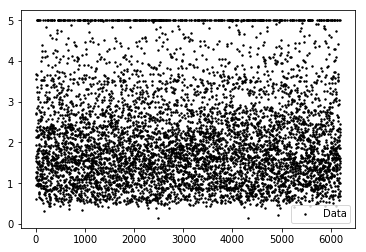

In [37]:
plt.scatter(range(len(Ytest)),Ytest,c='k',label='Data',s=2)
plt.legend()
plt.show()

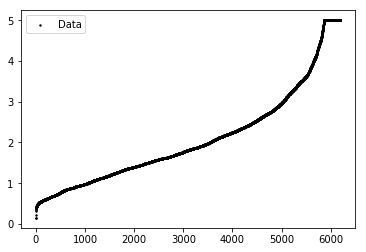

In [38]:
# 排序
plt.scatter(range(len(Ytest)),sorted(Ytest),c='k',label='Data',s=2)
plt.legend()
plt.show()

In [39]:
ind = np.argsort(Ytest)
ind

array([2477, 4318, 4930, ..., 2806, 2786, 3736], dtype=int64)

In [40]:
yhat = pd.DataFrame(yhat,index=ind)

In [34]:
#sorted(yhat.iloc[:,0])

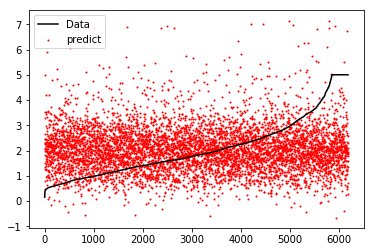

In [41]:
plt.plot(range(len(Ytest)),sorted(Ytest),c='k',label='Data')
plt.scatter(range(len(yhat)),yhat,c='red',label='predict',s=1)
plt.legend()
plt.show()

In [42]:
yhat = reg.predict(Xtest)

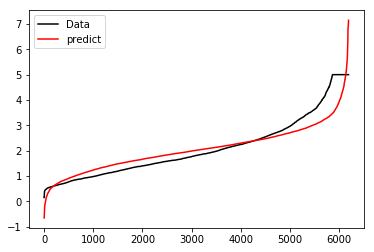

In [43]:
#将预测曲线与真实曲线画在同一张图上对比
plt.plot(range(len(Ytest)),sorted(Ytest),c='k',label='Data')
plt.plot(range(len(yhat)),sorted(yhat),c='red',label='predict')
plt.legend()
plt.show()

# 随机生成数据进行：模型运用

## 随机生成数据进行

In [35]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-179.11480837,   -5.70837982,  -15.38196168,  -77.07714165,
        -61.98484963])

## 导入系统自带数据集  进行建模、评价

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [47]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

#  使用岭回归来进行建模

In [48]:
#reg=Ridge()#alpha 设置不能太大（>可解决多重共线性）
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043610352312279

# 交叉验证下，与线性回归相比
，岭回归的结果如何变化？

In [49]:

from sklearn.model_selection import cross_val_score

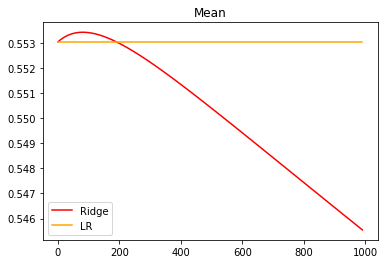

In [50]:
#for sklearn.
alpharange = np.arange(1,1001,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)#岭回归模型 实例化
    linear = LinearRegression()#线性回归模型实例化
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()#5折交叉验证 R2 评分岭回归模型
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()#5折交叉验证 R2 评分岭回归模型
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")#画出模型评估指标曲线
plt.plot(alpharange,lr,color="orange",label="LR")#画出模型评估指标曲线
plt.title("Mean")
plt.legend()
plt.show()

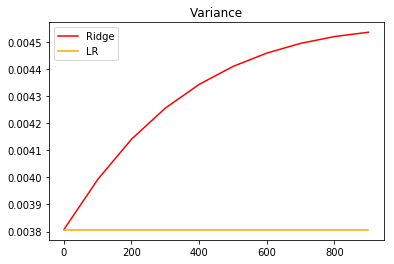

In [131]:
#模型方差如何变化？  方差越来越大 alpha 选选较小
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

# 进行建模、评价

In [51]:
# 导入系统自带数据集  进行建模、评价
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

In [52]:
X = load_boston().data
y = load_boston().target

In [53]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

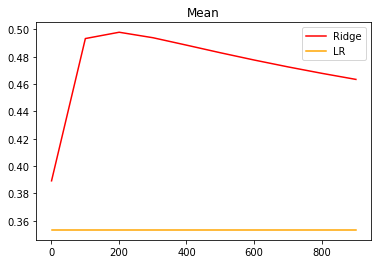

In [55]:
#查看R2的变化 数据的原因   看图检查多重共线性
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()


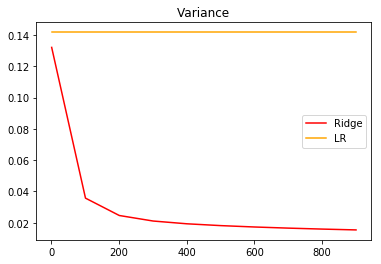

In [48]:
#先查看方差的变化 通过领回归后 方差变小 说明模型在改善
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

In [49]:
#另外一个领回归函数
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.arange(1,1001,100)
                ,scoring="neg_mean_squared_error"
                ,store_cv_values=True).fit(Xtrain,Ytrain)
                #,cv=5
    

###########################################
# loss 完全相关共线性也解决不了，但可解决高度相关

In [56]:
housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]


In [57]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [58]:
reg = LinearRegression().fit(Xtrain,Ytrain)#线性回归
(reg.coef_*100).tolist()#查看模型特征系数

[43.735893059684,
 1.0211268294493883,
 -10.780721617317667,
 62.64338275363759,
 5.216125353348089e-05,
 -0.3348509646333704,
 -41.30959378947717,
 -42.62109536208464]

In [59]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=100).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[42.634001645601316,
 1.0439364832937974,
 -8.648729864561023,
 51.48770904687697,
 0.00014136351561400633,
 -0.33260917707850896,
 -40.952268398537605,
 -42.09604680589351]

In [60]:
#Lasso进行拟合
lasso_ = Lasso(alpha=1 ).fit(Xtrain,Ytrain)#alpha=0
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423873,
 0.0,
 -0.0,
 -0.0002806598632901011,
 -0.0,
 -0.0,
 -0.0]

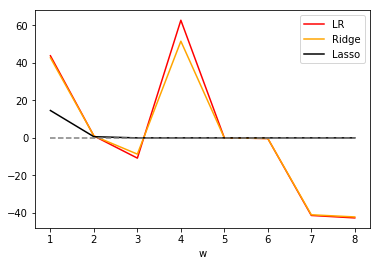

In [61]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

# 正则化参数选择

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [66]:

X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis]) 
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)


In [67]:
coefs = [] 
for a in alphas: 
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)   
    ridge.fit(X, y)   
    coefs.append(ridge.coef_)


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


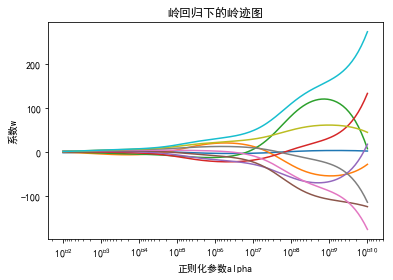

In [70]:
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文字体
plt.rcParams['axes.unicode_minus'] = False #设定正常显示字符

ax = plt.gca() 
ax.plot(alphas, coefs) 
ax.set_xscale('log') 
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('正则化参数alpha')
plt.ylabel('系数w')
plt.title('岭回归下的岭迹图') 
plt.axis('tight') 
plt.show()